# Observation Angle Model Present

## A Few Results with our Current Models

### Some stuff goes right some stuff does not.

In my research, we create a lot of Observation Angle Models of Titan. These models are 3D matrices with incidence, emission, and azimuth angles as coordinates, and the recorded value of Average I/F.

These models are created by taking pixels from either real VIMS data or SRTC++ simulations and putting them into 5 degree width bins, and then averaging out over all the pixels put into that bin.

Now that we have lots of models (and can generate new ones relatively easily) it's time to start collecting various results and describing what they mean, if anything can be determined, that is. 

There is almsot no code in this notebook, though at the bottom some does exist if you want to look at the data, play with it yourself, and generate your own plots.

Currently all plots are in 2um, though other wavelengths could be generated without too much effort.

## Some Results

The best graph produced for examination in general is the following:

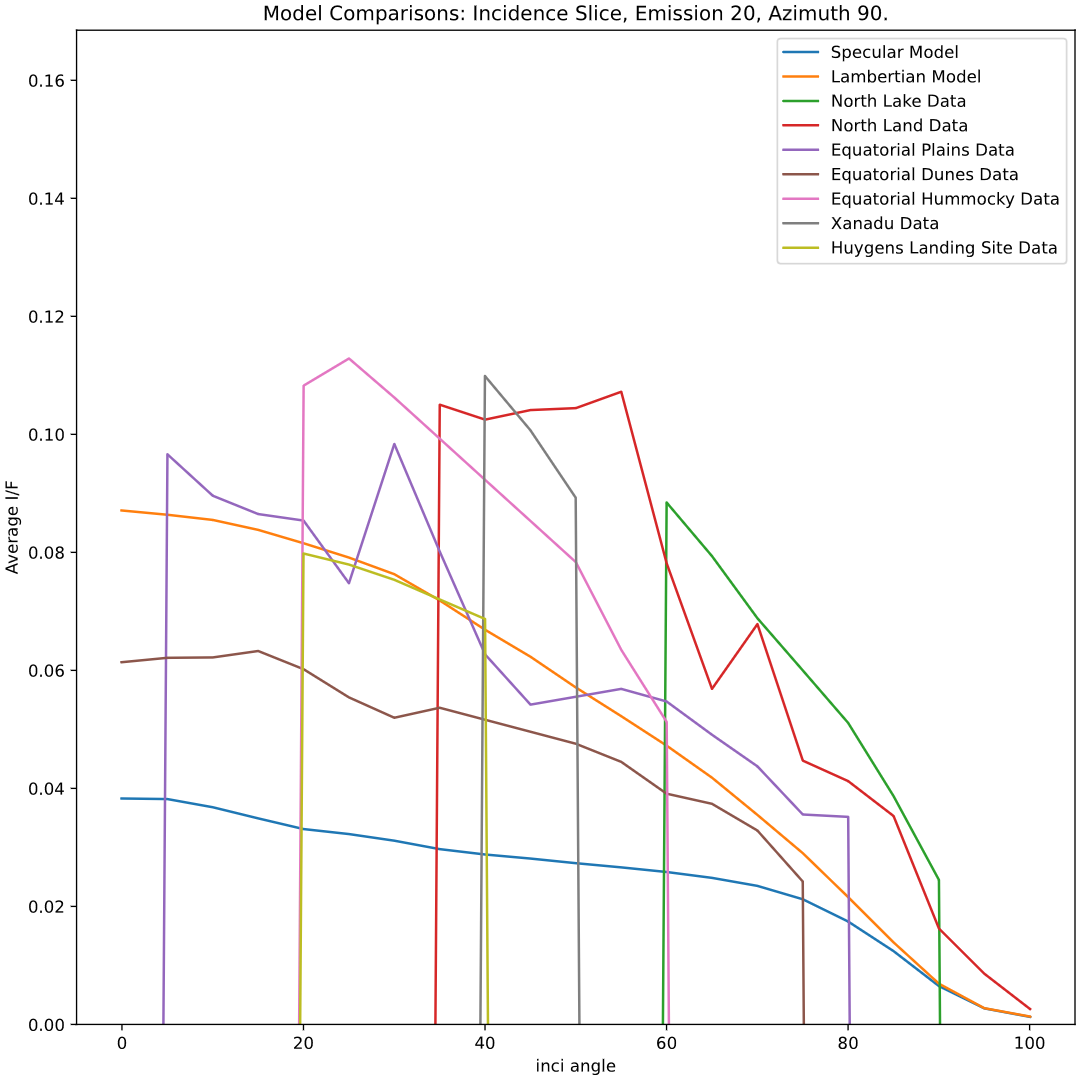

It displays all the major models and data so far, and with relative neatness as well as showcasing relations between the models that *usually* hold in most places, though there are a few oddities here.

This particular graph is a slice across the incidence angle (x axis) when the emission angle is 20 and the azimuth is 90. A place where we just so happen to have a lot of viewing gometries of most everything on Titan.

The Specular Model has the least I/F and is similar to none of the others. This is pretty generally true at all observation angles.

The Dunes Data has less I/F than the Lambertian Model, which is usually true. Just as how the Huygens Landing Site is almost perfectly lined up with the Lambertian Model. 

The Plains are a little unusual, here they follow the Lambertian Model relatively well, when in most viewing gometries the Plains are brighter. Furthermore, usually the Plains and Hummocky areas are very similar, but the Hummocks are clearly brighter here. 

Xanadu is remarkably well behaved in this viewing geometry, usually it's significantly brighter than all other models.

North Land and North Lake models are old, but they are consistently brighter than most other models (besides Xanadu).



The Huygens Landing Site doesn't exist in most views due to limited data, so let's examine it next.

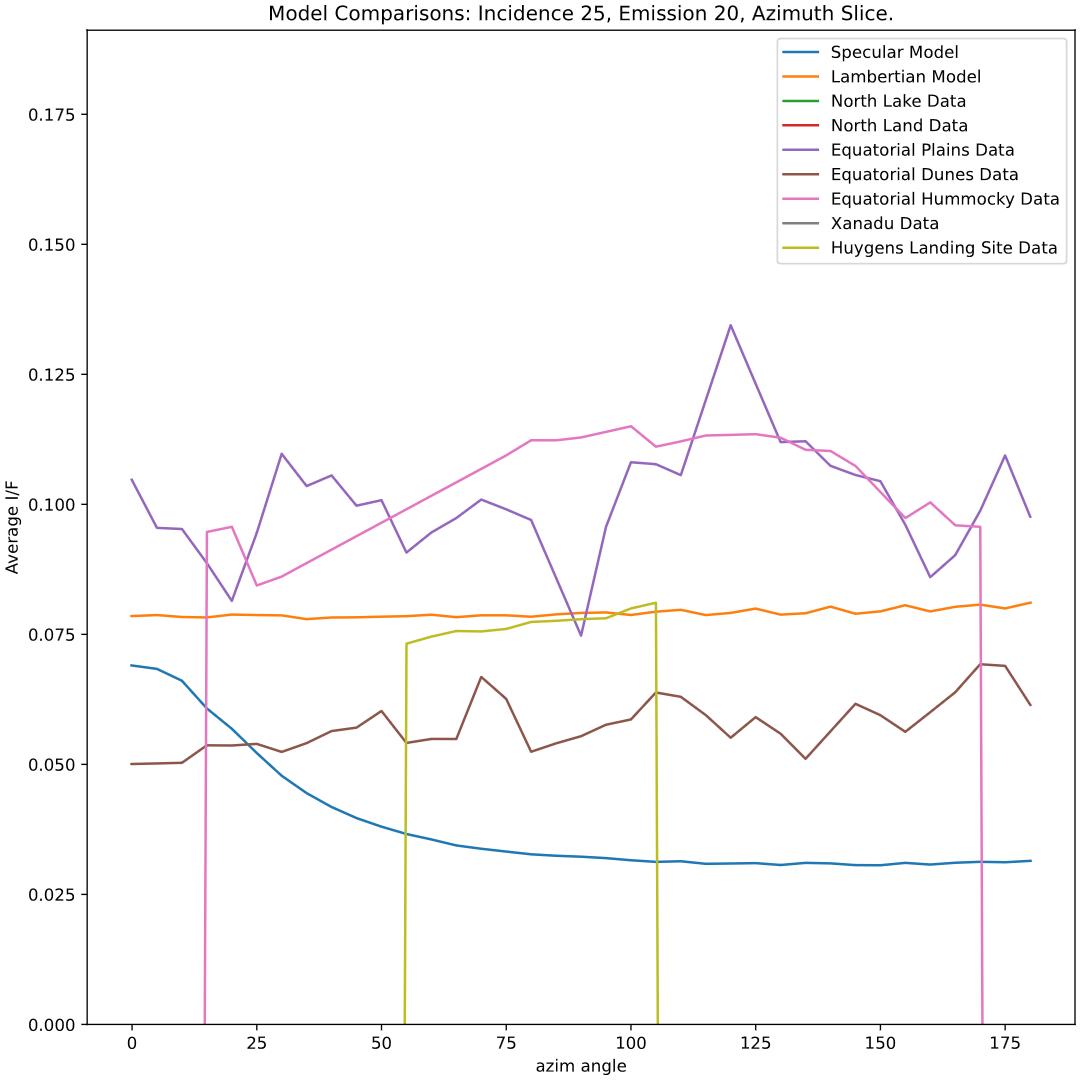

This view showcases the HLS as being right next to the Lambertian model as usual. Here the Plains and Hummocks are acting more like their usual selves, following each other and sitting mostly above the Lambertian Model. The Dunes sit conveniently below the Lambertian model. 

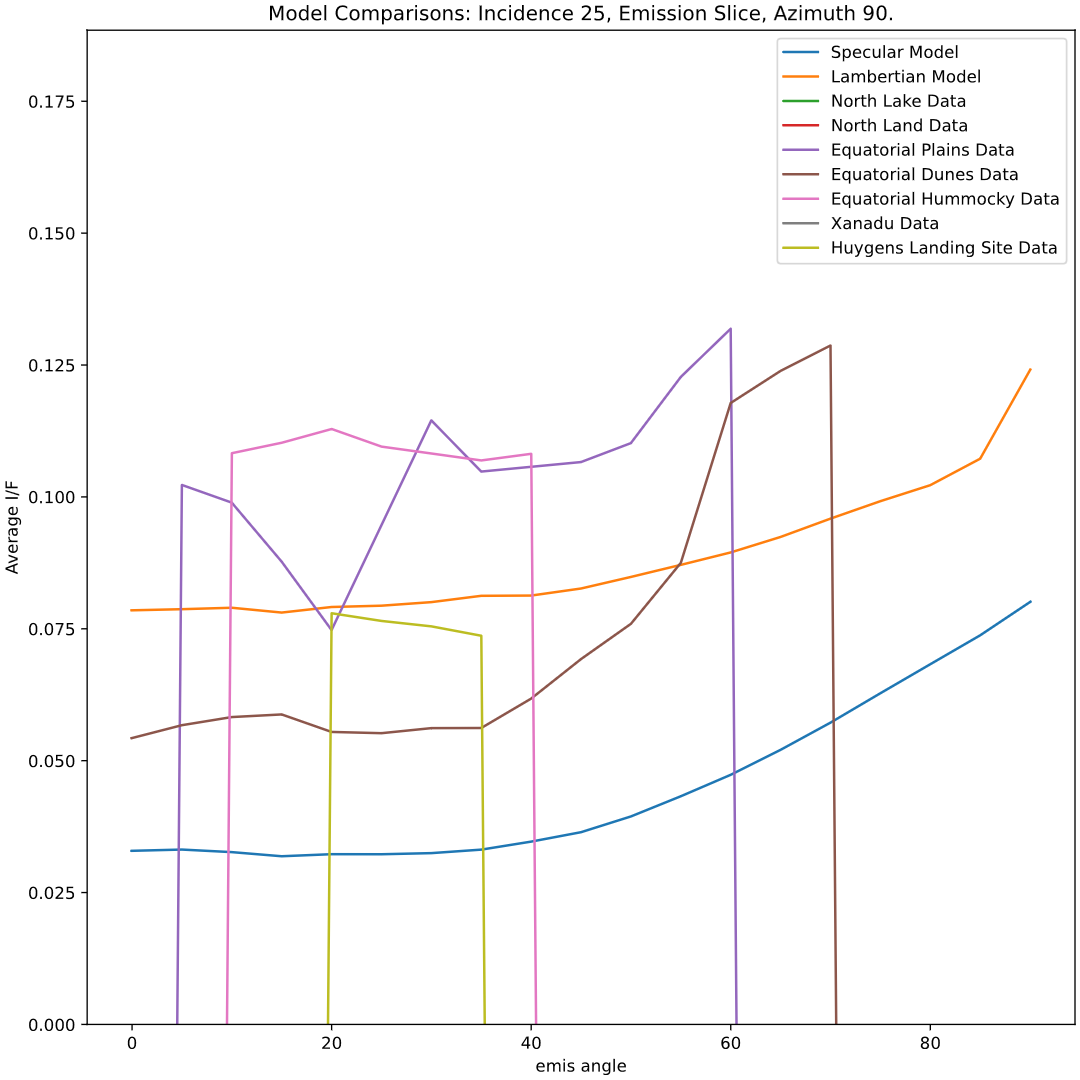

This result is somewhat similar, except it shows the Dunes misbehaving, which is a rare sight. Only occasionally do the dunes rise far *above* the Lambertian Model. 

Unfortunately the HLS doesn't have many other viewing gometries to examine, so its results must stop here for now.

Below is an example of a situation where the Lambertian model closely matches Dunes and Plains.

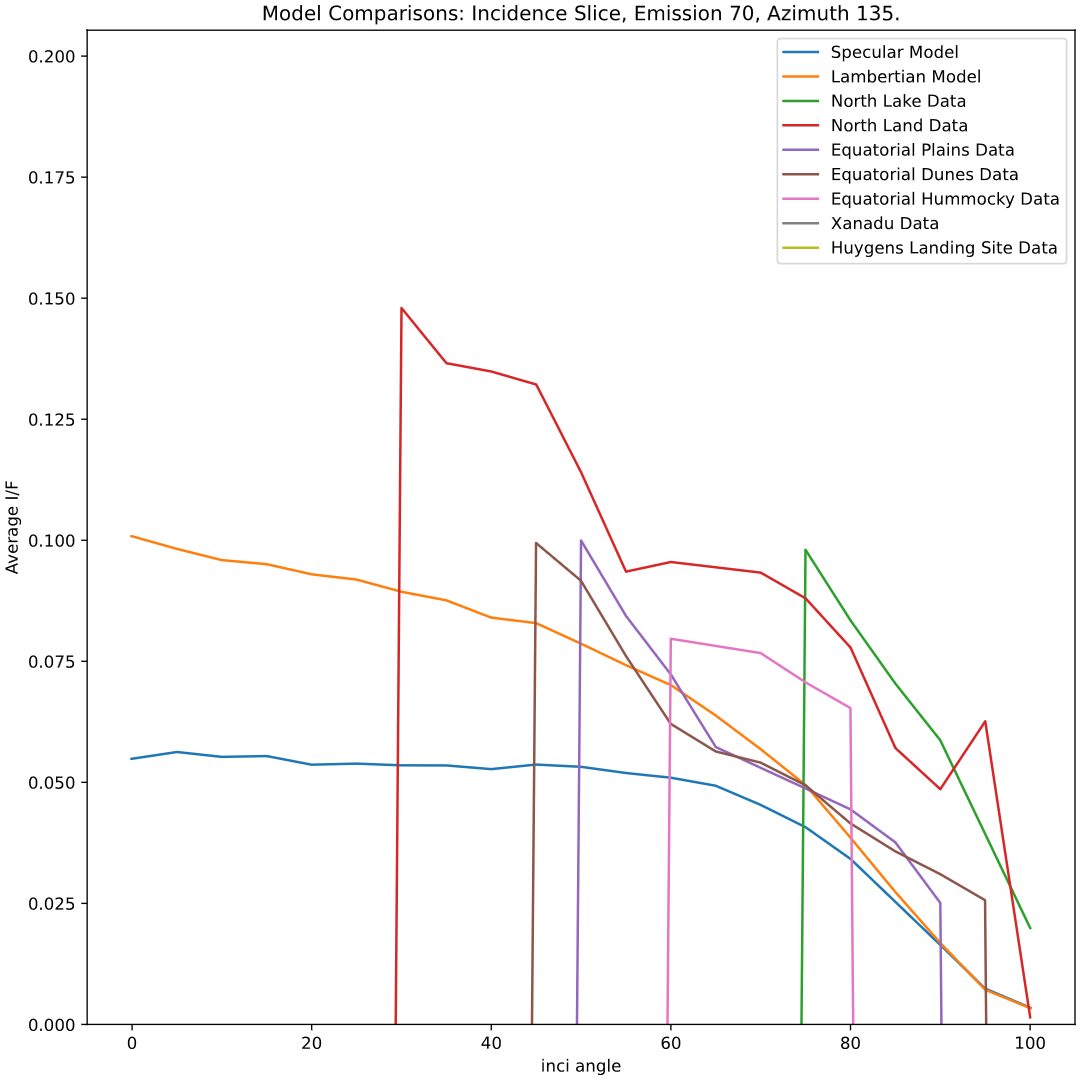

And one where just the Dunes match closely, the others don't.

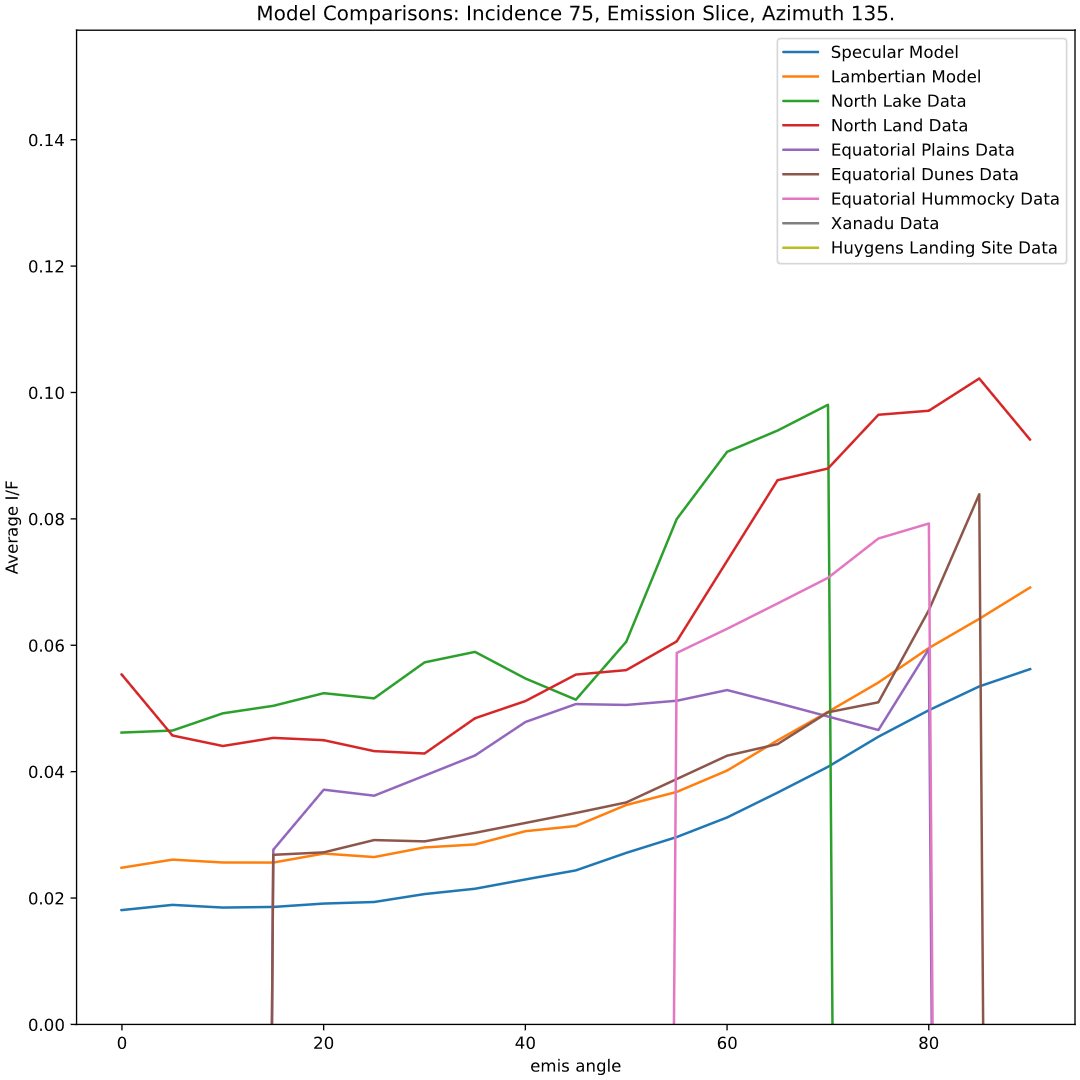

Adn one where most everything follows the Lambertian Model... except XANADU which is doing its OWN THING. 

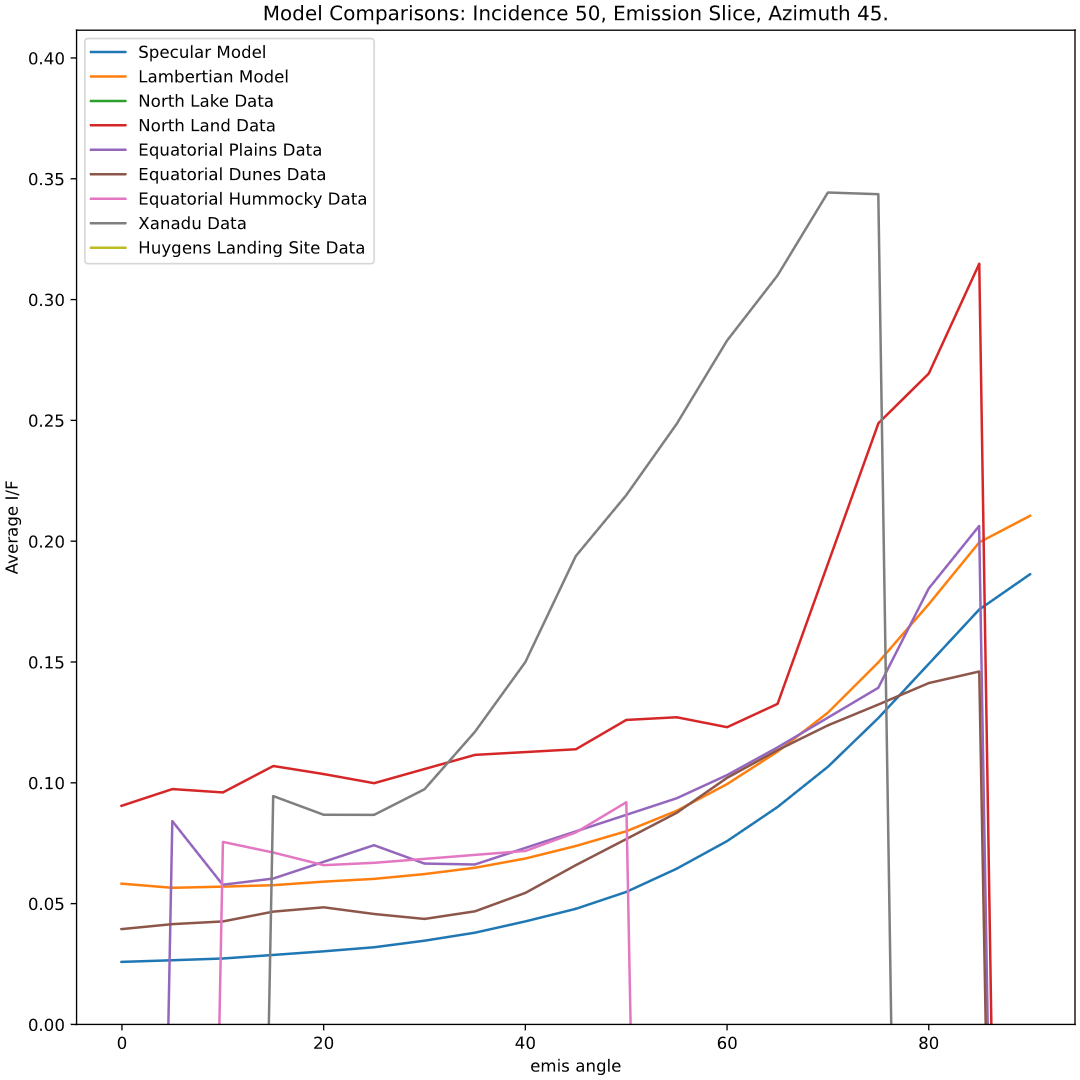

And lastly an example of the Dunes starting significantly below the Lambertian Model but changing to match it later. 

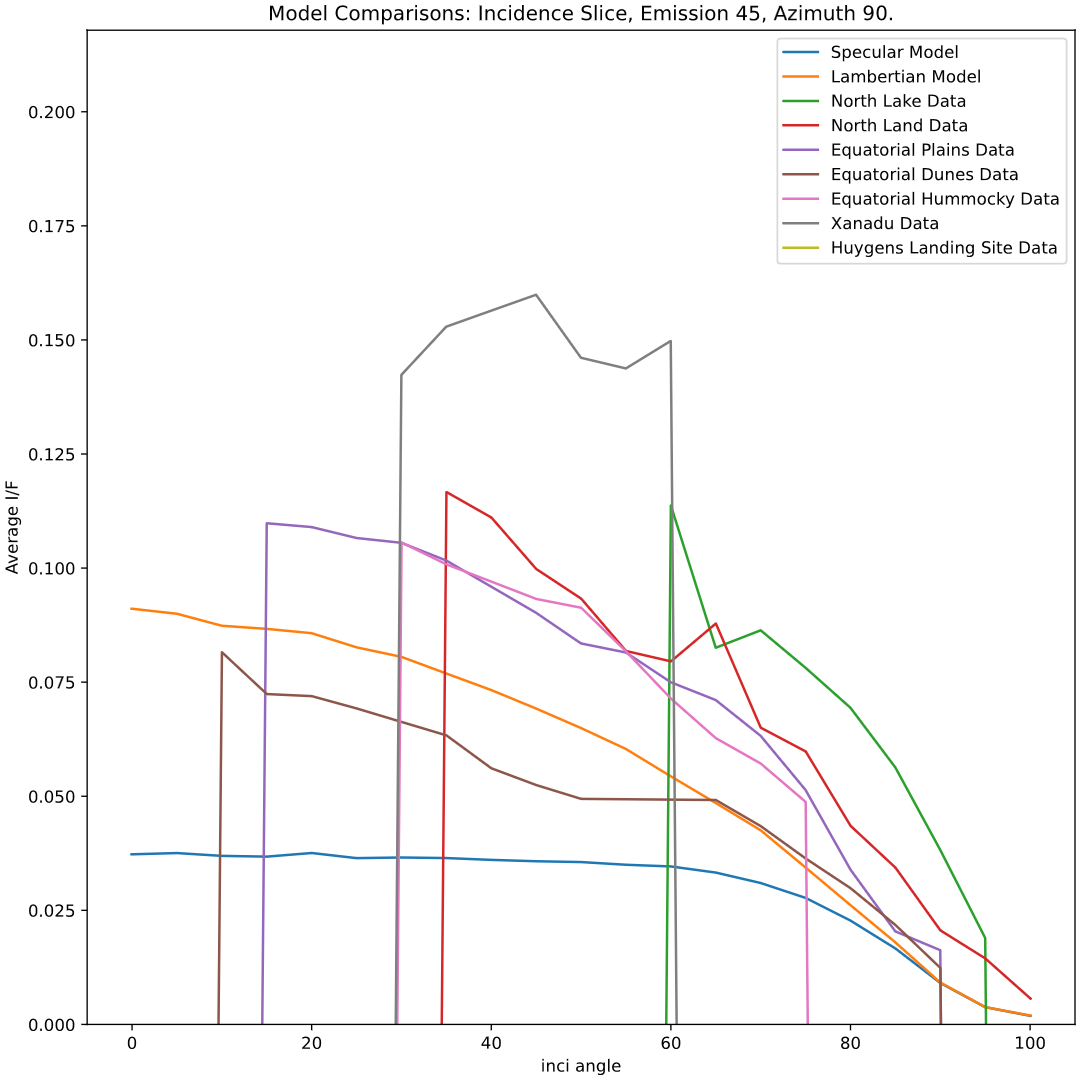

# CODE FOR CREATING YOUR OWN

In [4]:
#CELL 1: READ IN DATA.

import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

finalMatrixHuygens = np.load("HuygensArray.npy")
dataWin5 = np.load("SpecularModelArray.npy")
dataWin5L = np.load("LambertianModelArray.npy")
finalMatrixLake = np.load("NorthLakeArray.npy")
finalMatrixLand = np.load("NorthLandArray.npy")
finalMatrixDunes = np.load("DunesArray.npy")
finalMatrixPlains = np.load("PlainsArray.npy")
finalMatrixHum = np.load("HummockyArray.npy")
finalMatrixXanadu = np.load("XanaduArray.npy")

finalMatrixCustom = np.load("AllArray.npy") #For if the user wants to load in some other model of some kind.

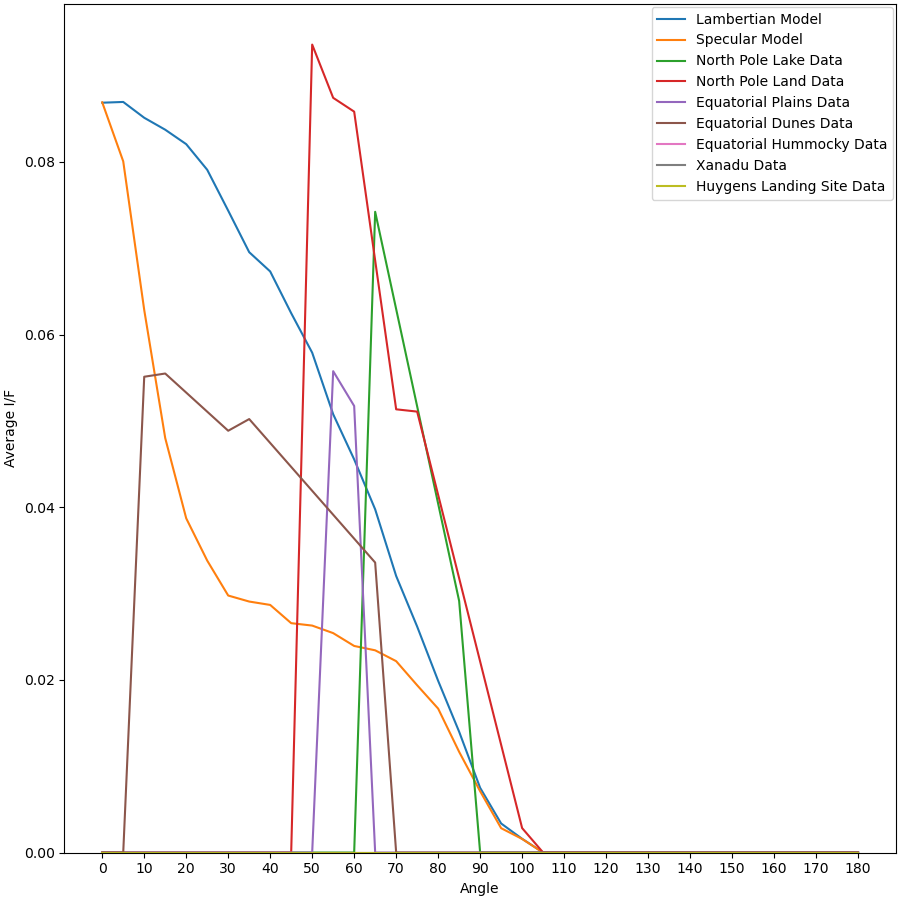

In [5]:
#CELL 2: OMNI DISPLAY: DISPLAYS ALL DATA AT ONCE ADJUSTABLE WITH SLIDERS.
%matplotlib ipympl 
#Allows animation and interaction.

plt.close()
import mpl_interactions.ipyplot as iplt
fig, ax = plt.subplots(figsize = (9,9), layout="constrained") #matplotlib's axis and figure notation is so annoying and obtuse...

angleSpace = np.linspace(0, 180, 37)
inciSpace = np.linspace(0, 100, 21)
emisSpace = np.linspace(0, 90, 19)
azimSpace = np.linspace(0, 180, 37)
typeSpace = np.linspace(1,3,3)

def SM(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(dataWin5[i][emis][azim]*8)
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(dataWin5[inci][i][azim]*8)
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(dataWin5[inci][emis][i]*8)
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine
def LM(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(dataWin5L[i][emis][azim]*8)
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(dataWin5L[inci][i][azim]*8)
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(dataWin5L[inci][emis][i]*8)
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine
def LkD(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixLake[i][emis][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixLake[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixLake[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine
def LnD(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixLand[i][emis][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixLand[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixLand[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def SpecialD(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixHuygens[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixHuygens[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixHuygens[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def eDunes(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixDunes[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixDunes[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixDunes[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def ePlains(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixPlains[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixPlains[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixPlains[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def eHumm(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixHum[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixHum[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixHum[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def eXana(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixXanadu[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixXanadu[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixXanadu[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1

    return theLine

def bonus(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixCustom[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixCustom[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixCustom[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1

    return theLine

angleLabels = [0, 10, 20, 30, 40, 50, 60, 70,
             80, 90, 100, 110, 120, 130, 140, 150,
             160, 170, 180] 

ticker = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]

controls = iplt.plot(LM, inci=inciSpace, emis=emisSpace, azim=azimSpace, types=typeSpace, ax = ax, label="Lambertian Model")
iplt.plot(SM, controls=controls, ax = ax, label="Specular Model")
iplt.plot(LkD, controls=controls, ax = ax, label="North Pole Lake Data")
iplt.plot(LnD, controls=controls, ax = ax, label="North Pole Land Data")
iplt.plot(ePlains, controls=controls, ax = ax, label="Equatorial Plains Data")
iplt.plot(eDunes, controls=controls, ax = ax, label="Equatorial Dunes Data")
iplt.plot(eHumm, controls=controls, ax = ax, label="Equatorial Hummocky Data")
iplt.plot(eXana, controls=controls, ax = ax, label="Xanadu Data")
iplt.plot(SpecialD, controls=controls, ax = ax, label="Huygens Landing Site Data")
#iplt.plot(bonus, controls=controls, ax = ax, label="Custom Data")
ax.set(ylim = 0.0,xlabel = "Angle", ylabel = "Average I/F", xticks = ticker, xticklabels = angleLabels)
fig.legend()
#plt.savefig("TitanColorSchemes.tif", format="tif", bbox_inches='tight')

plt.show()

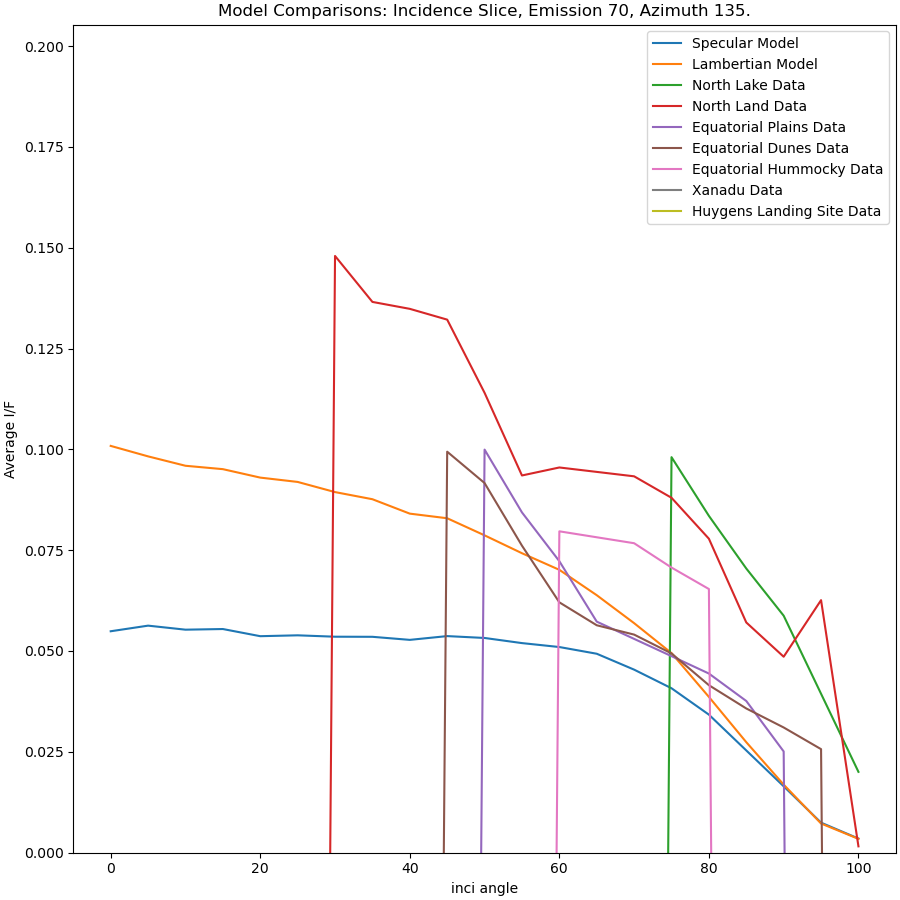

In [69]:
#55

plt.close()
# Getting a Sliced Line through the thing...
sline = "inci" # "inci" "emis" "azim" choose which variable to slice through.
inci = 5 #incidence, 13=65 degrees. This is the index that increments every 5 degrees. (5, 10, 15) is a good range.
emis = 14 #emission, 12=60 degrees. This is the index that increments every 5 degrees. (4, 9, 14) is a good range.
azim = 27 #azimuth, 36=180 degrees. This is the index that increments every 5 degrees. (9, 18, 27) is a good range. 

#The variable being sliced through will not be used. 

#Declare Models Here.
specModel = []
lambModel = []
lakeData = []
landData = []
huygensData = []
dunesData = []
plainsData = []
hummData = []
xanaData = []
customData = []
Eangles = []

#Load in 
i = 0
if (sline == "inci"):
    while (i < 21):
        specModel.append(dataWin5[i][emis][azim])
        lambModel.append(dataWin5L[i][emis][azim])
        lakeData.append(finalMatrixLake[i][emis][azim])
        landData.append(finalMatrixLand[i][emis][azim])
        huygensData.append(finalMatrixHuygens[i][emis][azim])
        dunesData.append(finalMatrixDunes[i][emis][azim])
        plainsData.append(finalMatrixPlains[i][emis][azim])
        hummData.append(finalMatrixHum[i][emis][azim])
        xanaData.append(finalMatrixXanadu[i][emis][azim])
        customData.append(finalMatrixCustom[i][emis][azim])
        Eangles.append(i*5.)
        i=i+1
if (sline == "emis"):
    while (i < 19):
        specModel.append(dataWin5[inci][i][azim])
        lambModel.append(dataWin5L[inci][i][azim])
        lakeData.append(finalMatrixLake[inci][i][azim])
        landData.append(finalMatrixLand[inci][i][azim])
        huygensData.append(finalMatrixHuygens[inci][i][azim])
        dunesData.append(finalMatrixDunes[inci][i][azim])
        plainsData.append(finalMatrixPlains[inci][i][azim])
        hummData.append(finalMatrixHum[inci][i][azim])
        xanaData.append(finalMatrixXanadu[inci][i][azim])
        customData.append(finalMatrixCustom[inci][i][azim])
        Eangles.append(i*5.)
        i=i+1
if (sline == "azim"):
    while (i < 37):
        specModel.append(dataWin5[inci][emis][i])
        lambModel.append(dataWin5L[inci][emis][i])
        lakeData.append(finalMatrixLake[inci][emis][i])
        landData.append(finalMatrixLand[inci][emis][i])
        huygensData.append(finalMatrixHuygens[inci][emis][i])
        dunesData.append(finalMatrixDunes[inci][emis][i])
        plainsData.append(finalMatrixPlains[inci][emis][i])
        hummData.append(finalMatrixHum[inci][emis][i])
        xanaData.append(finalMatrixXanadu[inci][emis][i])
        customData.append(finalMatrixCustom[inci][emis][i])
        Eangles.append(i*5.)
        i=i+1

fig, ax = plt.subplots(figsize = (9,9), layout="constrained") #matplotlib's axis and figure notation is so annoying and obtuse...

#Comment out the various plots to not plot their models.
ax.plot(Eangles, np.array(lambModel)*8., label="Lambertian Model")
ax.plot(Eangles, np.array(specModel)*8., label="Specular Model")
ax.plot(Eangles, np.array(lakeData), label="North Lake Data")
ax.plot(Eangles, np.array(landData), label="North Land Data")
ax.plot(Eangles, np.array(plainsData), label="Equatorial Plains Data")
ax.plot(Eangles, np.array(dunesData), label="Equatorial Dunes Data")
ax.plot(Eangles, np.array(hummData), label="Equatorial Hummocky Data")
ax.plot(Eangles, np.array(xanaData), label="Xanadu Data")
#ax.plot(Eangles, np.array(customData), label="Huygens Landing Site Data without Outlier")
ax.plot(Eangles, np.array(huygensData), label="Huygens Landing Site Data")
ax.set(xlabel = sline + " angle")
ax.set(ylabel = "Average I/F")
ax.set(title = "Model Comparisons: Incidence Slice, Emission " + str(emis * 5) + ", Azimuth " + str(azim * 5) + ".")
ax.legend()

ax.set(ylim = 0.0)

plt.savefig("ModelComparisonsISlE" + str(emis * 5) + "A" + str(azim * 5) + ".pdf", format="pdf")

plt.show()

In [19]:
#Save the plot you just generated.
#You may want to name it something else, naturally.

plt.savefig("ModelComparisonsI50E35ASl.pdf", format="pdf")

TODO:
More restrictive criteria to smoothen out Equatorial Models

New Polar Lakes Model

New Polar Plains Model

Temparate Plains Model (one for each hemisphere?) 

South Temparate Mountains Model?

South Polar Labyrinth Model?

South Polar Mountains Model?